<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/ProyectoML/AlgoritmoEvolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [2]:
def Plotter(e):

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.set_title('Epoch: {:.0f}'.format(e),fontsize=10)

  return fig,ax

In [3]:
def FuncionMinimizar(x):
  return x**2 + 10*np.sin(x)

In [4]:
class Robot:

  def __init__(self, f, Id=0):

    self.Id = Id
    self.f = f

    self.r = np.random.uniform(-10,10)

  # Getter de clase: Me da la posicion del robot
  def GetR(self):
    return self.r

  # Buscamos la posibilidad de mejorar (Mutar)
  def Mutate(self):
    # Cambiar el lugar donde estoy aleatoriamente
    #self.r += np.random.uniform(-0.001,0.001)
    self.r += np.random.normal(loc=0,scale=0.05)
    #print(self.Id,self.r)

  def SetFitness(self):
    #self.fitness = self.f(self.r)
    h = 1e-4
    self.fitness = np.abs((self.f(self.r+h) - self.f(self.r-h) )/(2*h))

  @property
  def Fitness(self):
    return self.fitness

  def __repr__(self):
    return f"Robot {self.Id}"

In [5]:
r = Robot(FuncionMinimizar)
r.GetR()

-6.166487550346518

In [6]:
# Queremos guardar los robots en una lista
def GetRobots(N):

  Robots = []

  for i in range(N):
    r = Robot(FuncionMinimizar,i)
    Robots.append(r)

  return Robots

In [7]:
Robots = GetRobots(100)

In [8]:
def Genetic(Robots, epochs=20):

  N = int(0.5*len(Robots))

  for e in range(epochs):

     # Plotting stuff
    clear_output(wait=True)
    _,ax = Plotter(e)

    # Mutar el genoma
    for i, p in enumerate(Robots):
      p.Mutate()
      p.SetFitness()

    # Queremos medir cual es más apto
    score = [ (p.Fitness, p) for p in Robots ]
    # Como ordenamos
    score = sorted(score, key=lambda x: x[0], reverse=False) # De menor a mayor
   # print(score)

    Temp = [r[1] for i, r in enumerate(score) if i < N]

    for i,r in enumerate(Robots):
      j = i%N
      Robots[i] = copy.deepcopy(Temp[j])


    # Pintar los robots
    for i, p in enumerate(Robots):
      #print(i,p)
      ax.scatter(p.GetR(),p.f(p.GetR()),marker='o')

    t = np.linspace(-5,5,100)
    ax.plot(t,FuncionMinimizar(t),color='b')

    plt.pause(0.01)
    plt.show()

KeyboardInterrupt: 

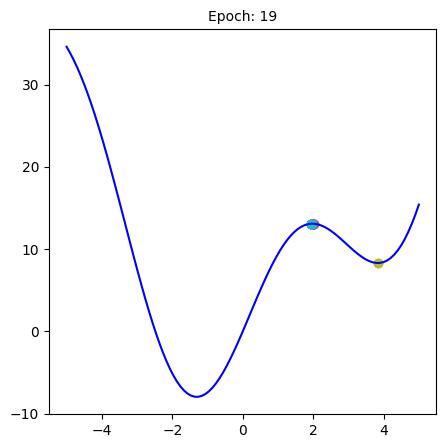

In [9]:
Genetic(Robots)